# BIG DATA - Data Analysis

---

NoteBook Created by **Raul E. Lopez Briega**

<a href='mailto:relopezbriega@gmail.com?subject=hello neo&body=Hola Raul ' target='_blank'>relopezbriega@gmail.com</a>

<a href='http://relopezbriega.com.ar' target='_blank'>relopezbriega.com.ar</a>

---

##Solution Title: Data Pythonisa

###Group: dotCOM
* **Captain**: Raul Lopez Briega
* **Member 2**:Stephanie Anglarill
* **Member 3**:Daniel Garac y Gojac

---

Licensed under the **Apache License, Version 2.0** (the "License"): you may
not use this file except in compliance with the License. You may obtain
a copy of the License at <a href='http://www.apache.org/licenses/LICENSE-2.0' target='_blank'>http://www.apache.org/licenses/LICENSE-2.0</a> Unless required by applicable law or agreed to in writing, software 
distributed under the License is distributed on an **_"AS IS" BASIS, WITHOUT 
WARRANTIES OR CONDITIONS OF ANY KIND_**, either express or implied. See the 
License for the specific language governing permissions and limitations 
under the License.

---

##Challenge business background



A non-profitable organization (NGO – non government organization) supports its
operation by organizing periodically some fund raising mailing campaigns. This
organization has created a huge **database with more than 3.5 million individuals
that at least once in the past was a donor**.
The fund raising campaigns are performed by sending to the mailing list (or to a
subset of it) a symbolic gift and asking for a donation.
Once the campaign is planned, the **campaign cost** is automatically known:
**_[number of potential donor contacted] x ([gift cost] + [mailing cost])_**.
Nevertheless, the fund raising result depends on both the number of donors that
respond to the campaign and the average amount of money that was donated.

The typical outcome of predictive modeling in database marketing is an estimate of
the expected response/return per customer in the database. **A marketer will mail
to a customer as long as the expected return from an order exceeds the cost
invested in generating the order**, i.e., the cost of promotion. For our purpose, the
package cost **_(([gift cost] + [mailing cost])_** of this new campaign is **0.75 per piece
mailed**.
**The net revenue of the campaign is calculated as the SUM(the actual donation amount minus 0.75) over all records for which the expected revenue (or predicted value of the donation) is over $0.75**. Our object is to help the NGO to select to which donors of its mailing list the campaign should address.

Some business in-sights might be used in order to drive the exploratory phase of
the data analysis. For example:

* It is quite difficult to get the attention of inactive donors (do not answer to the
NGO appeals in the last 24 months).

* From a long term perspective and health of the mailing list, donors that did no
answer to campaigns in the last 13 to 24 months may become inactive.

* So the provided data is the subset of donors that have not donated in the last 13 to 24 months (risk to become inactive).

* Is there any correlation (or inverse correlation) between likelihood to respond and the dollar amount of the gift?

* If there is an inverse correlation, should the high dollar donors be invited? 

* If they are suppressed, the loss revenue would offset any gains due to the increased response rate of the low dollar donors?

---

##Introduction

The rapid advance of infrastructure technologies have improved the ability to collect data throughout the enterprise. Virtually every aspect of business is now open to data collection and often even instrumented for data collection: operations, manufacturing, supply-chain management, customer behavior, marketing campaign performance, workflow procedures, and so on. At the same time, information is now widely available on external events such as market trends, industry news, and competitors’ movements. This broad availability of data has led to increasing interest in methods for extracting useful information and knowledge from data—the realm of **_data science_**.

With vast amounts of data now available, companies in almost every industry are focused on exploiting data for competitive advantage. In the past, firms could employ
teams of statisticians, modelers, and analysts to explore datasets manually, but the volume and variety of data have far outstripped the capacity of manual analysis. At the
same time, computers have become far more powerful, networking has become ubiquitous, and algorithms have been developed that can connect datasets to enable broader
and deeper analyses than previously possible. The convergence of these phenomena has
given rise to the increasingly widespread business application of data science principles
and data-mining techniques.

Data analysis is now so critical to business strategy. Businesses
increasingly are driven by data analytics, so there is great professional advantage in
being able to interact competently with and within such businesses. Understanding the
fundamental concepts, and having frameworks for organizing data-analytic thinking
not only will allow one to interact competently, but will help to envision opportunities
for improving data-driven decision-making, or to see data-oriented competitive threats.
Firms in many traditional industries are exploiting new and existing data resources for
competitive advantage. They employ data science teams to bring advanced technologies
to bear to increase revenue and to decrease costs. In addition, many new companies are
being developed with data mining as a key strategic component. 

_But the data can only help you if you know how to read it_; so in order to take advantage of it benefits, **we propose the following framework to manipulate, analyze, visualize and share the data insights:**

* The principal technology of our framework is **IPython Notebook**. The _IPython Notebook_ is a web-based interactive computational environment where you can combine code execution, text, mathematics, plots and rich media into a single document.These _notebooks_ are normal files that can be shared with colleagues, converted to other formats such as HTML or PDF, etc. This makes it easy to give your colleagues a document they can read immediately without having to install anything. **This document itselft was made using this technology.**

* For Data Analysis, we will use the **Python Programming Language**, most precisely, its great Data driven modules **pandas**, **scikit-learn**, **matplotlib** and **numpy**. As we will show in this notebook, these are wonderful tools for data analysis. Another alternative to Python, was the popular **statistics programming language R**. R is a great tool for data analysis, with great libraries too; but we choose Python because is easier to learn and understand than R. Moreover, if we need some specific functionality from R; we can call it from Python using **Rpy2** module and **iPython magic**. 

With this framework, we are not only going to be able to perform our analysis, but also we will able to create a easy sharing report as we do the analysis.

---

###Proof of Concent for gA Tech Contest 2013 - Challenge 02

---

Time to start with the analysis, the first thing to do is import the python modules we will use.

In [1]:
import pandas as pd # importing pandas
import numpy as np # importing numpy
from pandas import DataFrame, Series # importing DataFrame and Series objects from pandas
import matplotlib.pyplot as plt # importing matplotlib for plotting.
from sklearn.ensemble import RandomForestRegressor # importing RandomForest; maching learning algorithm for classification.
from IPython.display import Image, HTML, display # IPython rich display Image.
# Ignoring deprecation warning messages.
import warnings
warnings.filterwarnings('ignore')

# importing the R language iPython integration. Rmagic.
%load_ext rmagic 

To manipulate the data we will use the **_DataFrame_** object from pandas library. A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric,
string, boolean, etc.). it is like a in-memory table.

In [2]:
# Creating the NGOData DataFrame from the LEARNING dataset.
NGOData = pd.read_csv('/home/raul/Ga_Tech/gA Tech Contest 2013 - Challenge 02 - Datasets/LEARNING.csv',
                   header=0)

In [3]:
# Creating the donors subset from the NGOData.
NGOData_donors = NGOData[NGOData.DONOR_AMOUNT > 0]

---

## Starting the exploration.

Now it is when the fun start. We are going to start exploring the dataset, looking for insights and useful information.

### Analyzing the percent of donors.

First we will check the response percent using the DONOR_AMOUNT field.

In [4]:
round((NGOData[NGOData.DONOR_AMOUNT > 0]['DONOR_AMOUNT'].count() * 1.0 / NGOData['DONOR_AMOUNT'].count()) * 100.0, 2)
# percent of donors from the dataset.

5.08

As we can see the response percent is only **5.08**. Sometimes, the data are easy to understand if they are presented graphically. For example, we can created a pie chart for visualize this data with the following code.

In [5]:
donors = NGOData.groupby('DONOR_FLAG').IDX.count() # Grouping by DONOR_FLAG
# Creating the chart labels.
labels = [ 'Donors\n' + str(round(x * 1.0 / donors.sum() * 100.0, 2)) + '%'  for x in donors ]
labels[0] = 'No ' + labels[0]


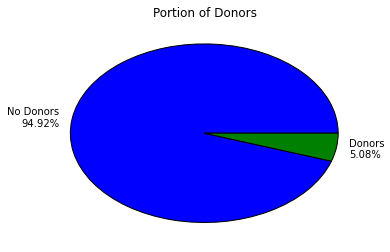

In [6]:
# Plotting the results using matplotlib.
fig = plt.figure()
p1 = fig.add_subplot(1,1,1)
p1.pie(donors, labels=labels)
p1.set_title('Portion of Donors')
plot = fig.show()

Here is clear the small portion of donors.

###Analizing donations amounts

Now we will explore the donations amounts, for this we will use the DataFrame object **NGOData_donors** that we created at the beginning.

In [7]:
donors_amounts = NGOData_donors.groupby('DONOR_AMOUNT').size() # Grouping by DONOR_FLAG

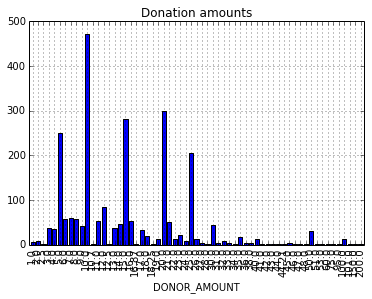

In [8]:
# Plotting the grouped amounts.
plot = donors_amounts.plot(kind='bar', title='Donation amounts')

This graphic is not clear because it has too many amounts; so we could make a segmentation; for this we will create a custom function in order to segment the amounts into categories.

In [9]:
def segment_amounts(serie):
    """This function return a pandas Series object with the values segemented into categories """
    
    # Create a Serie, with our segments as index.
    result = Series(index=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-100', '100-200']).fillna(0)
    
    # Segmenting the amounts into the new category indexes.
    for index, amount in serie.iteritems():
        if index < 10.1:
            result['0-10'] += amount
        elif index < 20.1:
            result['10-20'] += amount
        elif index < 30.1:
            result['20-30'] += amount
        elif index < 40.1:
            result['30-40'] += amount
        elif index < 50.1:
            result['40-50'] += amount
        elif index < 60.1:
            result['50-60'] += amount
        elif index < 100.1:
            result['60-100'] += amount
        else:
            result['100-200'] += amount
               
    return result

In [10]:
# Calling our segmentation function.
donors_amounts1 = segment_amounts(donors_amounts) 
donors_amounts1.index.name='Donation amount' # Naming the index.


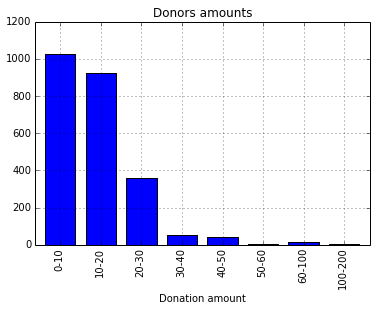

In [11]:
# Plotting semented results.
plot = donors_amounts1.plot(kind='bar', title='Donors amounts')

Now the plot is more clear. We can see that **the major number of donations are for a small amount, less than $30.**

Another way to get the same results is using the pandas built-in functions **cut** and **value_counts**.

In [12]:
# using pandas cut function to segment the Serie.
bb = pd.cut(NGOData_donors['DONOR_AMOUNT'], [0, 10,  20, 30, 40, 50, 60, 100, 200])

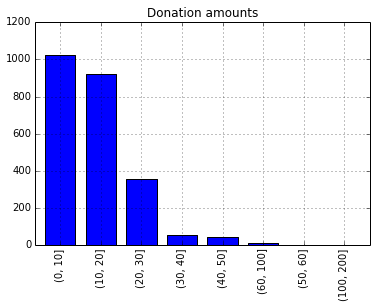

In [13]:
# Plotting the results using pandas value_counts function.
plot = pd.value_counts(bb).plot(kind='bar', title='Donation amounts')

One of the most useful graphics in descriptive statitics is the boxplot. the Boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes indicating variability outside the upper and lower quartiles. Outliers are plotted as individual points in this graphs.
Here, we will use **R language** to create the boxplot graph, because in R it is much easier to create a boxplot.

In [14]:
# R programming language is better for boxplot graph, so we will use Rmagic to made a donation amount boxplot using R.
# Passing python DataFrame to R.
%R -i NGOData_donors 

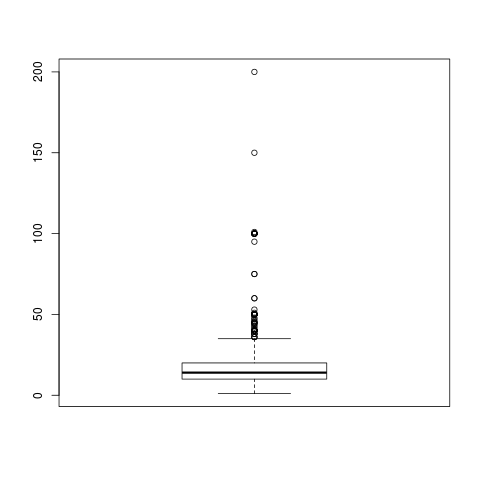

In [15]:
# R boxplot of donation amounts.
%R donation <- NGOData_donors$DONOR_AMOUNT
plot = %R boxplot(donation)

Here we can see that **donation amounts of 200 and 150 are outliers**; the main distribution of donation amounts is between 0 and 50, with an average of 15.

### Analyzing Total Cost and average Donation amounts.

Now we are going to analyze the profits if we mailing every donor in the data set.

In [16]:
cost = 0.75 # the cost by donor mailed.

In [17]:
# Calculating the profit of mailing every donor in the data set.
total_cost_all = cost * NGOData['DONOR_AMOUNT'].count()
total_donations_all = NGOData['DONOR_AMOUNT'].sum()
total_profits_all = round(total_donations_all - total_cost_all, 2)
total_profits_all

2004.53

In [18]:
# Average donation all dataset.
round(NGOData['DONOR_AMOUNT'].mean(), 2)

0.79

In [19]:
# Average donation only donators.
round(NGOData_donors['DONOR_AMOUNT'].mean(), 2)

15.6

In [20]:
# Average Profit
round((NGOData_donors['DONOR_AMOUNT'].sum() - \
       cost * NGOData['DONOR_AMOUNT'].count()) / NGOData['DONOR_AMOUNT'].count(), 2)

0.04

After our analysis we can see that the profit after mailing every donor in the dataset will be **2004.53**, with an average donation amount of **0.79** and a average porfit of **0.04**; not quite good numbers. We will try to improve this profits with our analysis.

###Exploring the data

In this section we start with the exploration process, we will try to find out some insights from the dataset.

In [21]:
# useful describe statistics on the data.
describe = NGOData.describe()

In [22]:
# Collection of numeric columns.
numeric_columns = list(describe.columns)

In [23]:
# Content of describe DataFrame for DONOR_AMOUNT column.
describe['DONOR_AMOUNT']

count    47720.000000
mean         0.792006
std          4.357312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: DONOR_AMOUNT, dtype: float64

Here we see that the describe method give us useful information that we can use to get some insights and could help us to filter the dataset.
Now we are going to export the content of **describe** to a CSV file, so we can take a better look using Excel or any other spreasheet tool.

In [24]:
describe.to_csv('/home/raul/Ga_Tech/gA Tech Contest 2013 - Challenge 02 - Datasets/NGODescribe.csv')

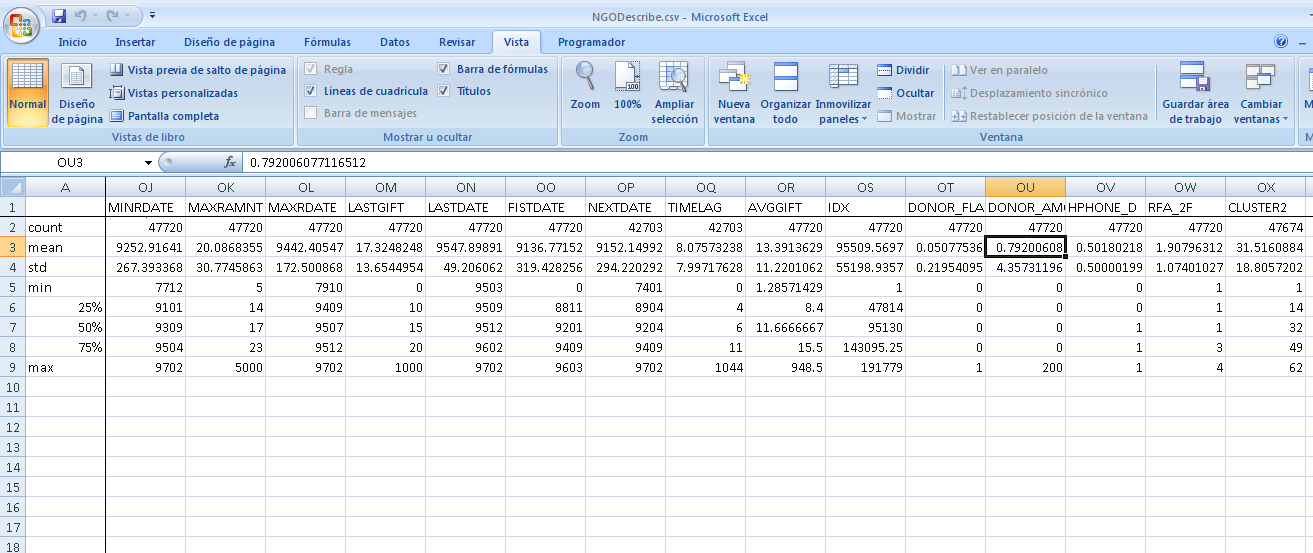

In [25]:
# Correlation DataFrame on Excel.
Image(filename='/home/raul/Ga_Tech/gA Tech Contest 2013 - Challenge 02 - Datasets/descr_excel.png')

After taking a look to the dataset, we are ready to select only some columns. This way the amount of data we have to manage is reduced and our exploration functions and algorithms run faster.

In [26]:
columns = [
   # demographics
   "ODATEDW", "OSOURCE", "STATE", "EC8", "PVASTATE", "DOB", "RECINHSE",
   "MDMAUD", "DOMAIN", "CLUSTER", "AGE", "HV2", "CHILD03", "CHILD07","IC4",
   "CHILD12", "CHILD18", "NUMCHLD", "INCOME", "GENDER", "WEALTH1", "HIT",
   # donor interests
   "COLLECT1", "VETERANS", "BIBLE", "CATLG", "HOMEE", "PETS", "CDPLAY",
   "STEREO", "PCOWNERS", "PHOTO", "CRAFTS", "FISHER", "GARDENIN", "BOATS",
   "WALKER", "KIDSTUFF", "CARDS", "PLATES",
   # PEP star RFA status
   "PEPSTRFL",
   # summary variables of promotion history
   "CARDPROM", "MAXADATE", "NUMPROM", "CARDPM12", "NUMPRM12",
   # summary variables of donation history
   "RAMNTALL", "NGIFTALL", "CARDGIFT", "MINRAMNT", "MAXRAMNT", "LASTGIFT",
   "LASTDATE", "FISTDATE", "TIMELAG", "AVGGIFT","RAMNT_3",
   # ID & donor variables.
   "IDX", "DONOR_FLAG", "DONOR_AMOUNT", 
   # RFA (Recency/Frequency/Donation Amount)
   "RFA_2F", "RFA_2A", "MDMAUD_R", "MDMAUD_F", "MDMAUD_A",
   #others
   "CLUSTER2", "GEOCODE2"]

In [27]:
# Creating a new DataFrame with the columns subset.
new_NGOData = NGOData[columns]

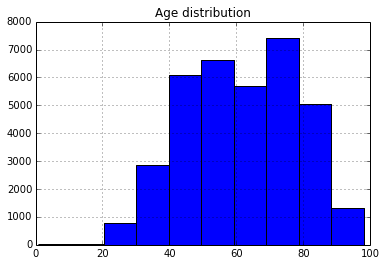

In [28]:
# Analysis of Age distribution.
plot = new_NGOData['AGE'].hist().set_title('Age distribution')

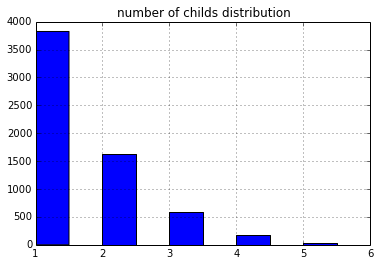

In [29]:
# Analysis of Number of childs.
plot = new_NGOData['NUMCHLD'].hist().set_title('number of childs distribution')

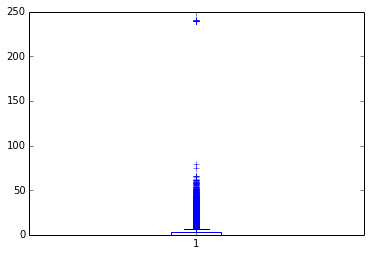

In [30]:
# exploring the HIT value. The number of responses of a donor.
plot = boxplot(new_NGOData['HIT'])

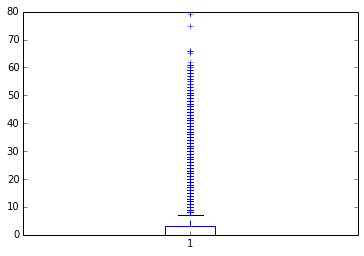

In [31]:
plot = boxplot(new_NGOData[new_NGOData.HIT < 200]['HIT'])

Here we can see that there are some values of the HIT variable that are separate from the majority of HIT distribution.

In [32]:
# Creating a new DataFrame of NGOData_donors with the columns subset.
new_NGOData_donors = NGOData_donors[columns]

In [33]:
AGE2 = pd.cut(new_NGOData_donors['AGE'], range(0, 100, 5))

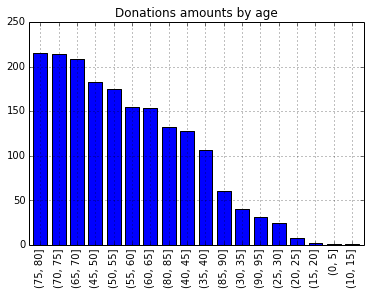

In [34]:
plot = pd.value_counts(AGE2).plot(kind='bar', title='Donations amounts by age')

In [35]:
# Adding the AGE2 segment column to our DataFrame.
new_NGOData_donors['AGE2'] = AGE2

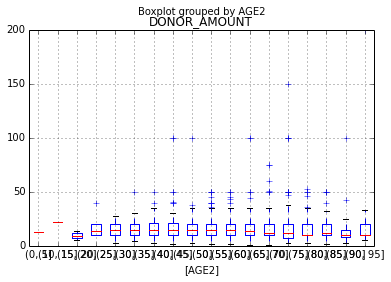

In [36]:
# Exploring the donors amounts by age.
plot = new_NGOData_donors[['DONOR_AMOUNT', 'AGE2']].boxplot(by='AGE2')

This plot shows that people aged from 30 to 60 are of higher median amount donation than others.

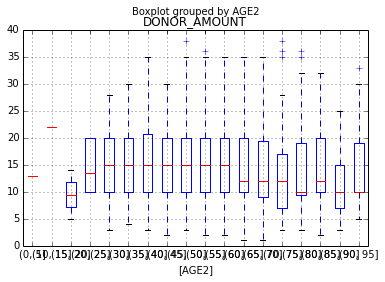

In [37]:
plot = new_NGOData_donors[new_NGOData_donors.DONOR_AMOUNT < 41][['DONOR_AMOUNT', 'AGE2']].boxplot(by='AGE2')

Here we confirmed the same observations.

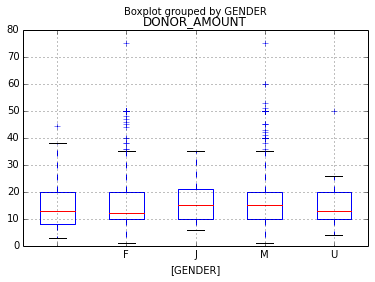

In [38]:
# Exploring the donors amounts by gender.
plot = new_NGOData_donors[new_NGOData_donors.DONOR_AMOUNT <= 80][['DONOR_AMOUNT', 'GENDER']].boxplot(by='GENDER')

Here we can see that the join and the male are the genders with the higher media amount of donations.

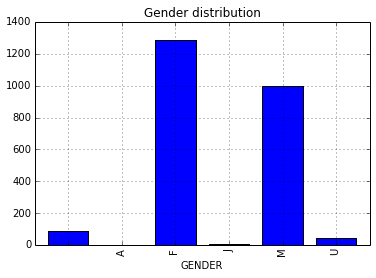

In [39]:
plot = new_NGOData_donors.groupby('GENDER').size().plot(kind='bar').set_title('Gender distribution')

in this plot we can see the proportion between Males and Females. Females is a larger group of donors.

In [40]:
# Listing the state ranking.
states = new_NGOData_donors.groupby('STATE').size()
states.sort(ascending=False)
states[:5] # top 5 states.

STATE
CA       536
FL       221
TX       191
MI       158
IL       141
dtype: int64

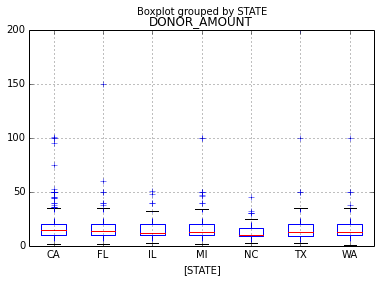

In [41]:
# Exploring the donors amounts by States.
plot = new_NGOData_donors[new_NGOData_donors.STATE.isin(['CA', 'FL', 'TX', 'MI', 'IL', 'NC', 'WA'])] \
[['DONOR_AMOUNT', 'STATE']].boxplot(by='STATE')

Here we see that most donations came from CA and FL states and the media donation amount of this states is greater than the others states.

### Checking the Correlation between DONOR_AMOUNT and the others numeric variables

Now we will check correlation to the donation amounts.

In [42]:
# numeric columns.
ix_numeric = list(NGOData.describe().columns)

In [43]:
# creating a correlation Serie.
correlation = NGOData[ix_numeric].corrwith(new_NGOData['DONOR_AMOUNT'])

In [44]:
# Sorting the correlation Serie.
correlation = abs(correlation)
correlation.sort(ascending=False)

In [45]:
correlation[:30]

DONOR_AMOUNT    1.000000
DONOR_FLAG      0.785909
SOLP3           0.166369
RDATE_3         0.151163
RAMNT_21        0.129239
RAMNT_3         0.124645
RAMNT_14        0.095202
RAMNT_22        0.091974
RDATE_4         0.088180
RAMNT_23        0.083415
RAMNT_7         0.076486
RAMNT_18        0.067036
RAMNT_15        0.066931
RAMNT_10        0.066879
RAMNT_9         0.064439
RAMNT_13        0.063320
RAMNT_11        0.057318
LASTGIFT        0.055957
RAMNT_12        0.053011
RDATE_6         0.050917
AVGGIFT         0.049913
RAMNT_19        0.043131
RAMNTALL        0.041039
RAMNT_8         0.040195
HV2             0.038930
RAMNT_24        0.038608
HVP3            0.038538
HV1             0.037778
IC4             0.037231
RDATE_17        0.037183
dtype: float64

Here we see the **fields with the best correlation to the donor amount**.

In [46]:
# Correlation between all columns.
corr_all = NGOData[ix_numeric].corr()

In [47]:
corr_all[ix_numeric[:5]][:5]

,ODATEDW,TCODE,DOB,CLUSTER,AGE
ODATEDW,1.000000,-0.038042,0.103204,-0.062950,-0.314072
TCODE,-0.038042,1.000000,-0.000883,-0.001927,0.011410
DOB,0.103204,-0.000883,1.000000,-0.044693,-0.999755
CLUSTER,-0.062950,-0.001927,-0.044693,1.000000,0.002666
AGE,-0.314072,0.011410,-0.999755,0.002666,1.000000


In [48]:
# Export the correlation DataFrame to csv.
corr_all.to_csv('/home/raul/Ga_Tech/gA Tech Contest 2013 - Challenge 02 - Datasets/corr_all.csv')
correlation.to_csv('/home/raul/Ga_Tech/gA Tech Contest 2013 - Challenge 02 - Datasets/corr_amounts.csv')

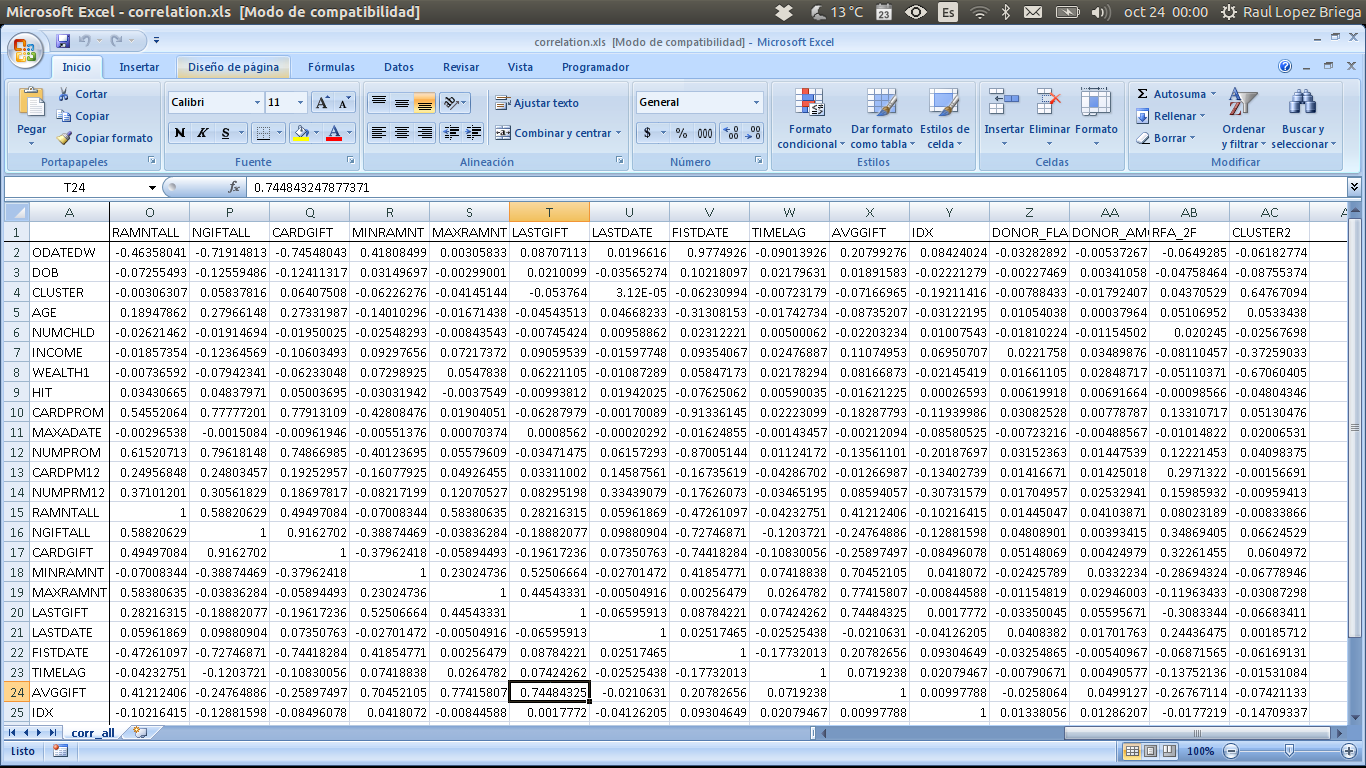

In [49]:
# Correlation DataFrame on Excel.
Image(filename='/home/raul/Ga_Tech/gA Tech Contest 2013 - Challenge 02 - Datasets/corr_excel.png')

###Calculating donation probability

Here we are going to calculate some porbabilities based on the insights we obtains with the correlation calculations and our exploration.

In [50]:
#Calculating overall donation probability.
average_prob = round((NGOData[NGOData.DONOR_AMOUNT > 0]['DONOR_AMOUNT'].count() * 1.0 \
           / NGOData['DONOR_AMOUNT'].count()) * 100.0, 2)
average_prob 

5.08

In [51]:
#Calculating donation probability for donors with a lastgift less or equal to 10.
a = round((NGOData[(NGOData.DONOR_AMOUNT > 0) & (NGOData.LASTGIFT <= 10)]['DONOR_AMOUNT'].count() * 1.0 \
      / NGOData[NGOData.LASTGIFT <= 10]['DONOR_AMOUNT'].count()) * 100.0, 2)
a

6.94

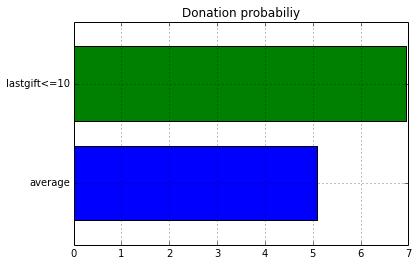

In [52]:
# Plotting the comparison.
lastgift = Series({'average': average_prob, 'lastgift<=10': a})
plot=lastgift.plot(kind='barh', color=['blue', 'green']).set_title('Donation probabiliy')

In [53]:
# Average donation.
average_donation = round(NGOData_donors['DONOR_AMOUNT'].mean(), 2)
average_donation

15.6

In [54]:
# Average donation lastgift <= 10
a = round(NGOData_donors[NGOData_donors.LASTGIFT <= 10]['DONOR_AMOUNT'].mean(), 2)
a

8.85

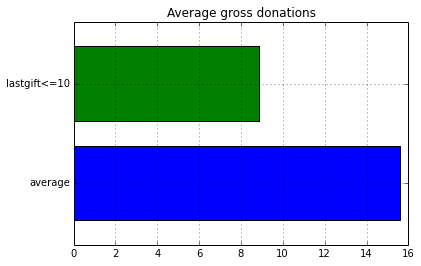

In [55]:
# Plotting the comparison.
lastgift = Series({'average': average_donation, 'lastgift<=10': a})
plot = lastgift.plot(kind='barh', color=['blue', 'green']).set_title('Average gross donations')

In [56]:
#Calculating donation probability for donors with a lastgift greater than 35.
a = round((NGOData[(NGOData.DONOR_AMOUNT > 0) & (NGOData.LASTGIFT >35)]['DONOR_AMOUNT'].count() * 1.0 \
      / NGOData[NGOData.LASTGIFT > 35]['DONOR_AMOUNT'].count()) * 100.0, 2)
a

3.64

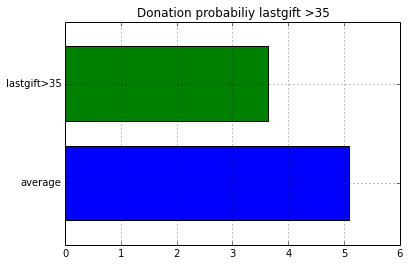

In [57]:
# Plotting the comparison.
lastgift = Series({'average': average_prob, 'lastgift>35': a})
plot=lastgift.plot(kind='barh', color=['blue', 'green']).set_title('Donation probabiliy lastgift >35')

In [58]:
# Average donation lastgift > 35
a = round(NGOData_donors[NGOData_donors.LASTGIFT > 35]['DONOR_AMOUNT'].mean(), 2)
a

51.04

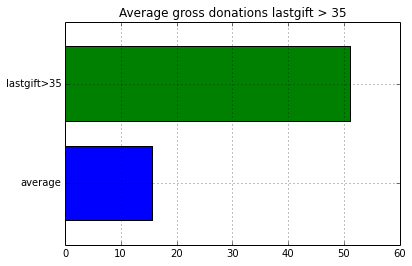

In [59]:
# Plotting the comparison.
lastgift = Series({'average': average_donation, 'lastgift>35': a})
plot = lastgift.plot(kind='barh', color=['blue', 'green']).set_title('Average gross donations lastgift > 35')

Here we can see that the donation probability is better when the previous donation amount decrease. We can conclude that **there is a inverse correlation between the donation amounts and the probability of donation**.

In [60]:
# Total donation learning data set.
total_donation = round(NGOData_donors['DONOR_AMOUNT'].sum(), 2)
total_donation

37794.53

In [61]:
# donation amount for donors with lastgift > 35
a = round(NGOData_donors[NGOData_donors.LASTGIFT > 35]['DONOR_AMOUNT'].sum(), 2)
a

3266.87

In [62]:
# Donors with higher average donation.
b = round(NGOData_donors[NGOData_donors.LASTGIFT > 35]['DONOR_AMOUNT'].count(), 2)
b

64.0

In [63]:
# percentage of total donation.
round(a / total_donation * 100, 4)

8.6438

Here we can see thath **only 64 donors accounts for the 8% of the total donation amount.**

In [64]:
# donation amount for donors with max donation over $30
a = round(NGOData_donors[NGOData_donors.MAXRAMNT > 30]['DONOR_AMOUNT'].sum(), 2)
a

5064.08

In [65]:
# Donors with max donation over $30
b = round(NGOData_donors[NGOData_donors.MAXRAMNT > 30]['DONOR_AMOUNT'].count(), 2)
b

136.0

In [66]:
# percentage of total donation.
round(a / total_donation * 100, 4)

13.399

Here we can see thath **only 136 donors account for the 13% of the total donation amount.**

In [67]:
# donation amount for donors with total past donations greater than $250
a = round(NGOData_donors[NGOData_donors.RAMNTALL > 250]['DONOR_AMOUNT'].sum(), 2)
a

4389.0

In [68]:
# Donors with total past donations greater than $250
b = round(NGOData_donors[NGOData_donors.RAMNTALL > 250]['DONOR_AMOUNT'].count(), 2)
b

178.0

In [69]:
# percentage of total donation.
round(a / total_donation * 100, 4)

11.6128

In [70]:
# overlap between the two previous segments
b = round(NGOData_donors[(NGOData_donors.RAMNTALL > 250) & (NGOData_donors.MAXRAMNT >30) ]\
          ['DONOR_AMOUNT'].count(), 2)
b

54.0

only 54 donors in common between the two segments

In [71]:
#Calculating donation probability for donors who have donated in the 96NK campaign.
a = round((NGOData[(NGOData.DONOR_AMOUNT > 0) & (NGOData.RAMNT_3 > 3.5)]['DONOR_AMOUNT'].count() * 1.0 \
      / NGOData[NGOData.RAMNT_3 > 3.5]['DONOR_AMOUNT'].count()) * 100.0, 2)
a

16.19

people who have donated over $3.50 in the 96NK campaign have a higher probability of donating than the average.

In [72]:
# Average donation for donors who have donated in the 96NK campaign.
b = round(NGOData_donors[NGOData_donors.RAMNT_3 > 3.5]['DONOR_AMOUNT'].mean(), 2)
b

15.29

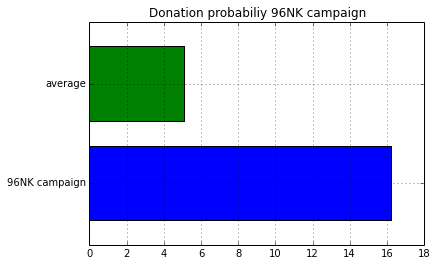

In [73]:
# Plotting the comparison.
comp = Series({'average': average_prob, '96NK campaign': a})
plot=comp.plot(kind='barh', color=['blue', 'green']).set_title('Donation probabiliy 96NK campaign')

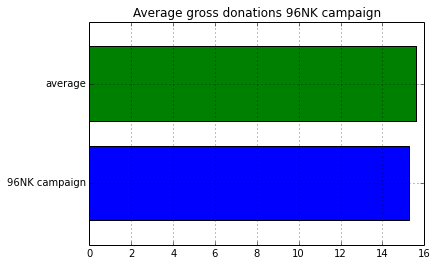

In [74]:
# Plotting the comparison.
comp = Series({'average': average_donation, '96NK campaign': b})
plot = comp.plot(kind='barh', color=['blue', 'green']).set_title('Average gross donations 96NK campaign')

In [75]:
# IC4 Average family income in hundreds
IC4 = round(NGOData_donors['IC4'].mean(), 2)
IC4

448.34

In [76]:
#Calculating donation probability for IC4
a = round((NGOData[(NGOData.DONOR_AMOUNT > 0) & (NGOData.IC4 > 800)]['IC4'].count() * 1.0 \
      / NGOData[NGOData.IC4 > 800]['DONOR_AMOUNT'].count()) * 100.0, 2)
a

6.21

In [77]:
# Average donation for IC4
b = round(NGOData_donors[NGOData_donors.IC4 > 800]['DONOR_AMOUNT'].mean(), 2)
b

19.91

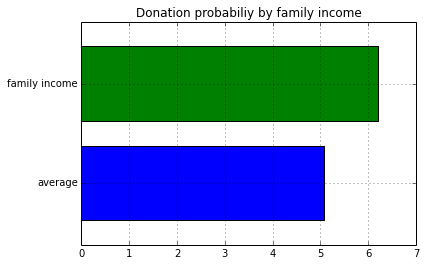

In [78]:
# Plotting the comparison.
comp = Series({'average': average_prob, 'family income': a})
plot=comp.plot(kind='barh', color=['blue', 'green']).set_title('Donation probabiliy by family income')

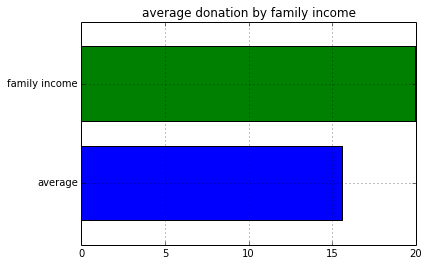

In [79]:
# Plotting the comparison.
comp = Series({'average': average_donation, 'family income': b})
plot = comp.plot(kind='barh', color=['blue', 'green']).set_title('average donation by family income')

In [80]:
a = round(NGOData_donors[NGOData_donors.IC4 > 800]['DONOR_AMOUNT'].count())
a

113.0

In [81]:
b = round(NGOData_donors[NGOData_donors.IC4 > 800]['DONOR_AMOUNT'].sum())
b

2250.0

In [82]:
# percentage of total donation.
round(b / total_donation * 100, 4) 

5.9532

**6% of total donation came from families with an average income greater than 80.000 a year.**

In [83]:
#Calculating donation probability for HV2
a = round((NGOData[(NGOData.DONOR_AMOUNT > 0) & (NGOData.HV2 > 1600)]['HV2'].count() * 1.0 \
      / NGOData[NGOData.HV2 > 1600]['DONOR_AMOUNT'].count()) * 100.0, 2)
a

6.24

In [84]:
# Average donation for HV2
b = round(NGOData_donors[NGOData_donors.HV2 > 1600]['DONOR_AMOUNT'].mean(), 2)
b

17.39

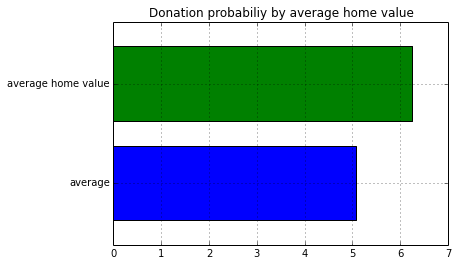

In [85]:
# Plotting the comparison.
comp = Series({'average': average_prob, 'average home value': a})
plot=comp.plot(kind='barh', color=['blue', 'green']).set_title('Donation probabiliy by average home value')

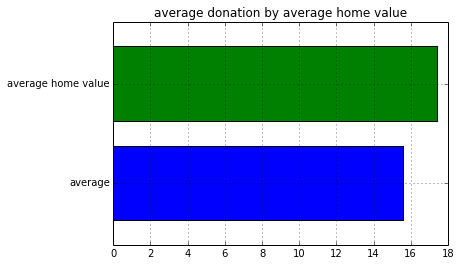

In [86]:
# Plotting the comparison.
comp = Series({'average': average_donation, 'average home value': b})
plot = comp.plot(kind='barh', color=['blue', 'green']).set_title('average donation by average home value')

In [87]:
b = round(NGOData_donors[NGOData_donors.HV2 > 1600]['DONOR_AMOUNT'].sum())
b

9929.0

In [88]:
a = round(NGOData_donors[NGOData_donors.HV2 > 1600]['DONOR_AMOUNT'].count())
a

571.0

In [89]:
# percentage of total donation.
round(b / total_donation * 100, 4) 

26.271

**26% of total donation came from families with an average home value greater than 160.000.**

In [90]:
#Calculating donation probability for EC8
a = round((NGOData[(NGOData.DONOR_AMOUNT > 0) & (NGOData.EC8 > 12)]['EC8'].count() * 1.0 \
      / NGOData[NGOData.EC8 > 12]['DONOR_AMOUNT'].count()) * 100.0, 2)
a

6.04

In [91]:
# Average donation for EC8
b = round(NGOData_donors[NGOData_donors.EC8 > 12]['DONOR_AMOUNT'].mean(), 2)
b

17.75

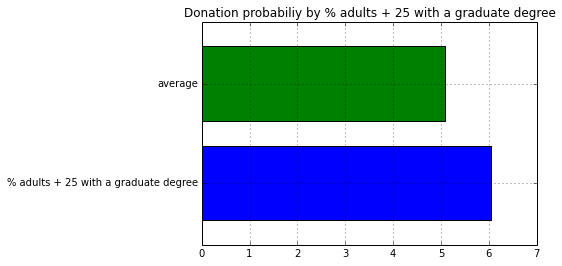

In [92]:
# Plotting the comparison.
comp = Series({'average': average_prob, '% adults + 25 with a graduate degree ': a})
plot=comp.plot(kind='barh', color=['blue', 'green']).set_title('Donation probabiliy \
by % adults + 25 with a graduate degree')

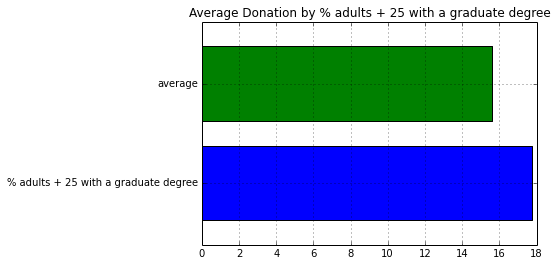

In [93]:
# Plotting the comparison.
comp = Series({'average': average_donation, '% adults + 25 with a graduate degree ': b})
plot=comp.plot(kind='barh', color=['blue', 'green']).set_title('Average Donation by \
% adults + 25 with a graduate degree')

In [94]:
# Number of donors with a EC8 greater than 12.
a = round(NGOData_donors[NGOData_donors.EC8 > 12]['DONOR_AMOUNT'].count())
a

509.0

In [95]:
# total donation of donors with a EC8 greater than 12.
b = round(NGOData_donors[NGOData_donors.EC8 > 12]['DONOR_AMOUNT'].sum())
b

9034.0

In [96]:
# percentage of total donation.
round(b / total_donation * 100, 2) 

23.9

**24% of total donation came from families with an % of adults +25 with graduate degree greater than 12**

---

###Conclutions from exploration phase

From the exploration phase we can conclude that **the most significant variables for predicting a customer’s donation behavior are the previous donation behavior summaries**.

---

---

##Building our prediction model

With all the information we collected in the exploration phase, now we are ready to start building our prediction model. 

First we will **start with a single model**. To build this model, we have created **7 segments** from the different insight we got from the exploration data analysis. These segments are:

 1. **MAXRAMNT > 30** 
 2. **RAMNTALL > 250**
 3. **HV2 > 1600 and AGE between 30 and 60.**
 4. **EC8 > 12**
 5. **IC4 > 800**
 6. **RAMNT_3 > 3.5**
 7. **STATE in ('CA', 'FL', 'MI')**


As a first step, we build a function to apply our criteria selection to a dataframe. 

In [97]:
def apply_model(df):
    """ This function applies our model sampling to a dataset.
    
        Criteria:
        1. MAXRAMNT > 30
        2. RAMNTALL > 250
        3. HV2 > 1600 and AGE between 30 and 60.
        4. EC8 > 12
        5. IC4 > 800
        6. RAMNT_3 > 3.5
        7. STATE in ('CA', 'FL', 'MI')
    
        This function will return a python set object with the
        list of IDXs that are selected by our model criteria selection.
    
    """
        
    #Building the model sample.
    # Segments samples.
    sample7 = df[df.STATE.isin(['CA', 'FL', 'MI'])]['IDX']
    sample3 = df[(df.HV2 > 1600) & (df.AGE >=30)& (df.AGE >=60)]['IDX']
    sample4 = df[df.EC8 > 12]['IDX']
    sample1 = df[df.MAXRAMNT > 30]['IDX']
    sample2 = df[df.RAMNTALL > 250]['IDX']
    sample5 = df[df.IC4 > 800]['IDX']
    sample6 = df[df.RAMNT_3 > 3.5]['IDX']

    # depurating the model sample.
    sample = set(sample7.values)
    # using sets difference propierty to depurate the sample.
    sample = sample ^ set(sample3.values)
    sample = sample ^ set(sample4.values)
    sample = sample ^ set(sample1.values)
    sample = sample ^ set(sample2.values)
    sample = sample ^ set(sample5.values)
    sample = sample ^ set(sample6.values)
    
    return sample
    

Then we build another function to test our single model.

In [98]:
# Building our simple model.
def single_model(df, cost):
    """
    This function apply the simple model to a DataFrame.
    The model is builded under the following segments:
    
    1. MAXRAMNT > 30
    2. RAMNTALL > 250
    3. HV2 > 1600 and AGE between 30 and 60.
    4. EC8 > 12
    5. IC4 > 800
    6. RAMNT_3 > 3.5
    7. STATE in ('CA', 'FL', 'MI')
    
    Parameters:
    * df : DataFrame to apply the model
    * cost: Cost per piece mailed.
    
    print the dataset and model information
    plot the comparison between the given dataset and the model.
    
    Returns the DataFrame with the model subselection.
    
    """
    # copy the Dataframe to a new object.
    df1 = df
    
    #Calculating profits for all DataFrame.
    total_donations_all = round(df['DONOR_AMOUNT'].sum(), 2)
    total_cost_all =  round(cost * df['DONOR_AMOUNT'].count(), 2) 
    total_profits_all = total_donations_all - total_cost_all
    mean_donation_all = df[df.DONOR_FLAG == 1]['DONOR_AMOUNT'].mean()
    donation_prob_all = round((df[df.DONOR_FLAG == 1]['DONOR_AMOUNT'].count() * 1.0 \
                               / df['DONOR_AMOUNT'].count()) * 100.0, 2)
    
    #Building the model sample with our apply_sample function.
    sample = apply_model(df)

    sample_all = list(sample) # sample size.
    
    # Applying our sample to the new dataframe.
    df1 = df1[df1.IDX.isin(sample_all)]

    # Calculating contribution profits of model
    total_donations = round(df1['DONOR_AMOUNT'].sum(), 2)
    total_cost =  round(cost * len(sample_all), 2)                       
    model_profits = total_donations - total_cost
    profit_improvement = round(((model_profits - total_profits_all) / total_profits_all) * 100, 2)
    mean_donation = df1[NGOData.DONOR_FLAG == 1]['DONOR_AMOUNT'].mean()
    donation_prob = (float(df1[NGOData.DONOR_FLAG == 1]['DONOR_AMOUNT'].count()) \
                / float(len(sample))) * 100
    donors_percent = (len(sample) * 1.0 /df['IDX'].count()) * 100.0

    # Printing the results
    # Printing all df values.
    print 'Original dataset values:\n'
    print 'All dataset size: %d' % df['IDX'].count()
    print 'All dataset donation prob.: %.2f%%' % donation_prob_all
    print 'All dataset donations: $%.2f' % total_donations_all
    print 'All dataset cost: $%.2f' % total_cost_all
    print 'All dataset profits: $%.2f' % total_profits_all
    print 'All dataset mean donation: $%.2f' % mean_donation_all
    print '\n'
    # Printing model values.
    print 'Model values:\n'
    print 'Model sample size: %d' % len(sample)
    print 'Model sample donation prob.: %.2f%%' % donation_prob
    print 'Model total donations: $%.2f' % total_donations
    print 'Model total cost: $%.2f' % total_cost
    print 'Model total profits: $%.2f' % model_profits
    print 'Model mean donation: $%.2f' % mean_donation
    print 'Model profit improvement: %.2f %%' % profit_improvement
    print 'Model donors mailed percent: %.2f %%' % donors_percent
    
    # Plotting the comparison.
    # Average donation
    comp = Series({'All dataset average donation': mean_donation_all, 'Model average donation': mean_donation})
    comp2 = Series({'All dataset donation prob.': donation_prob_all, 'Model donation porb.': donation_prob})
    plt.figure()
    comp.plot(kind='barh', color=['blue', 'green']).set_title('Average Donation all dataset vs model')
    plt.figure()
    comp2.plot(kind='barh', color=['blue', 'green']).set_title('Donation probability all dataset vs model')
           
    return df1

Original dataset values:

All dataset size: 47720
All dataset donation prob.: 5.08%
All dataset donations: $37794.53
All dataset cost: $35790.00
All dataset profits: $2004.53
All dataset mean donation: $15.60


Model values:

Model sample size: 17561
Model sample donation prob.: 5.61%
Model total donations: $16199.78
Model total cost: $13170.75
Model total profits: $3029.03
Model mean donation: $16.43
Model profit improvement: 51.11 %
Model donors mailed percent: 36.80 %


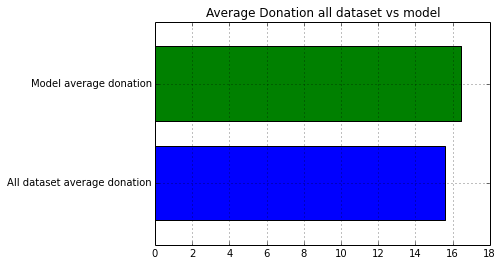

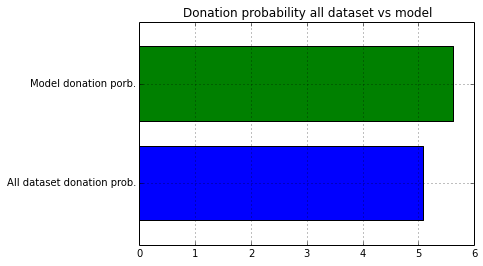

In [99]:
# Applying the simple model to the NGO dataset.
x = single_model(NGOData, cost)

Applying this single model to the LEARNING dataset we can see a profit improvement of **51.11%**; in our model we only need to mail **17,561 customers** from the dataset to obtain a mean donation of **16.43** and a total profit of **3,020.03**

---

## Applying the model to the validation dataset

Now, we can test our simple model in the **validation dataset**. In this dataset we do not have any donation information, so we have to infer it from the **learning dataset**.

In [100]:
# Creating the NGOvalidation DataFrame from the VALIDATION dataset.
NGOvalidation = pd.read_csv('/home/raul/Ga_Tech/gA Tech Contest 2013 - Challenge 02 - Datasets/VALIDATION.txt',
                   header=0)

In order to test our model in the validation dataset; we need to build a custom function that predict the donation amounts for the validation dataset from the learning dataset.

In [101]:
def single_model_val(dfl, dfv, cost):
    """
    This function apply the simple model to a DataFrame.
    The model is builded under the following segments:
    
    1. MAXRAMNT > 30
    2. RAMNTALL > 250
    3. HV2 > 1600 and AGE between 30 and 60.
    4. EC8 > 12
    5. IC4 > 800
    6. RAMNT_3 > 3.5
    7. STATE in ('CA', 'FL', 'MI')
    
    Parameters:
    * dfl : the learning dataset.
    * dfv : the validation dataset.
    * cost: Cost per piece mailed.
    
    Prints the original dataset, the learning dataset and the validation dataset information.
    Plot the comparison between the given dataset and the model.
    
    Returns the DataFrame with the model subselection.
    
    """
        
    learn = dfl # copy the learning dataset
    valid = dfv # copy the validation dataset
        
    learn_values = apply_model(learn) # applying our model to the learning dataset
    valid_values = apply_model(valid) # applying our model to the validation dataset

    learn = learn[learn.IDX.isin(learn_values)] # selecting the customers
    valid = valid[valid.IDX.isin(valid_values)] # selecting the customers
           
    # Calculating variables for learning dataset
    total_donations_learn = round(learn['DONOR_AMOUNT'].sum(), 2)
    total_cost_learn =  round(cost * len(learn_values), 2)                       
    model_profits_learn = total_donations_learn - total_cost_learn
    mean_donation_learn = learn[learn.DONOR_FLAG == 1]['DONOR_AMOUNT'].mean()
    donation_prob_learn = (float(learn[learn.DONOR_FLAG == 1]['DONOR_AMOUNT'].count()) \
                / float(len(learn_values))) 
    
    #Calculating variables for all DataFrame.    
    mean_donation_all = dfl[dfl.DONOR_FLAG == 1]['DONOR_AMOUNT'].mean()
    donation_prob_all = dfl[dfl.DONOR_FLAG == 1]['DONOR_AMOUNT'].count() * 1.0 \
                               / dfl['DONOR_AMOUNT'].count()
    total_donations_all = mean_donation_all * donation_prob_all * len(dfv)
    total_cost_all =  cost * len(dfv)
    total_profits_all = total_donations_all - total_cost_all
        
    # Calculation varaibles for validation dataset.
    total_donations_valid = mean_donation_learn * donation_prob_learn * len(valid_values)
    total_cost_valid =  round(cost * len(valid_values), 2)
    model_profits_valid = total_donations_valid - total_cost_valid
    donors_percent_valid = (len(valid_values) * 1.0 /dfv['IDX'].count()) * 100.0
    profit_improvement_valid = (model_profits_valid - total_profits_all) / total_profits_all 

    # Printing the results
    # Printing all df values.
    print 'Original validation dataset values:\n'
    print 'All dataset size: %d' % len(dfv)
    print 'All dataset donation prob.: %.2f%% (infer from learning)' % (donation_prob_all * 100)
    print 'All dataset donations: $%.2f (infer from learning)' % total_donations_all
    print 'All dataset cost: $%.2f' % total_cost_all
    print 'All dataset profits: $%.2f' % total_profits_all
    print 'All dataset mean donation: $%.2f (infer from learning)' % mean_donation_all
    print '\n'
    # Printing learning df values.
    print 'Learning dataset values:\n'
    print 'Learning dataset size: %d' % len(learn_values)
    print 'Learning dataset donation prob.: %.2f%%' % (donation_prob_learn * 100)
    print 'Learning dataset donations: $%.2f' % total_donations_learn
    print 'Learning dataset cost: $%.2f' % total_cost_learn
    print 'Learning dataset profits: $%.2f' % model_profits_learn
    print 'Learning dataset mean donation: $%.2f' % mean_donation_learn
    print '\n'
    # Printing validation values.
    print 'Validation dataset values:\n'
    print 'Validation sample size: %d' % len(valid_values)
    print 'Validation sample donation prob.: %.2f%%' % (donation_prob_learn * 100)
    print 'Validation total donations: $%.2f' % total_donations_valid
    print 'Validation total cost: $%.2f' % total_cost_valid
    print 'Validation total profits: $%.2f' % model_profits_valid
    print 'Validation mean donation: $%.2f' % mean_donation_learn
    print '\n'
    print 'Model profit improvement: %.2f %%' % (profit_improvement_valid * 100)
    print 'Model donors mailed percent: %.2f %%' % donors_percent_valid
    
    # Plotting the comparison.
    # Average donation
    comp = Series({'All dataset average donation': mean_donation_all, \
                   'Model average donation': mean_donation_learn})
    comp2 = Series({'All dataset donation prob.': donation_prob_all * 100, \
                    'Model donation porb.': donation_prob_learn * 100.0})
    plt.figure()
    comp.plot(kind='barh', color=['blue', 'green']).set_title('Average Donation all dataset vs model')
    plt.figure()
    comp2.plot(kind='barh', color=['blue', 'green']).set_title('Donation probability all dataset vs model')
           
        
    return valid
    

Original validation dataset values:

All dataset size: 47692
All dataset donation prob.: 5.08% (infer from learning)
All dataset donations: $37772.35 (infer from learning)
All dataset cost: $35769.00
All dataset profits: $2003.35
All dataset mean donation: $15.60 (infer from learning)


Learning dataset values:

Learning dataset size: 17561
Learning dataset donation prob.: 5.61%
Learning dataset donations: $16199.78
Learning dataset cost: $13170.75
Learning dataset profits: $3029.03
Learning dataset mean donation: $16.43


Validation dataset values:

Validation sample size: 17700
Validation sample donation prob.: 5.61%
Validation total donations: $16328.01
Validation total cost: $13275.00
Validation total profits: $3053.01
Validation mean donation: $16.43


Model profit improvement: 52.39 %
Model donors mailed percent: 37.11 %


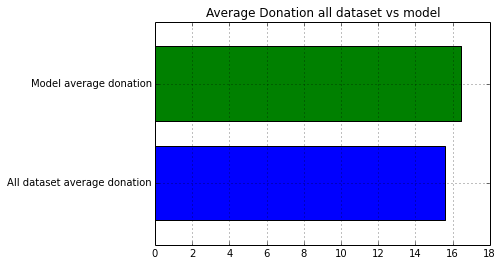

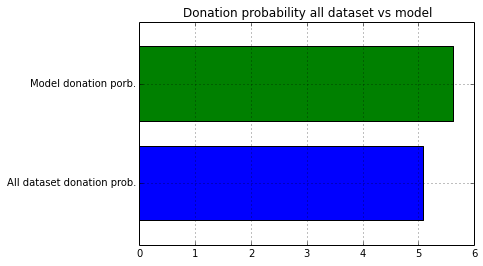

In [103]:
aa = single_model_val(NGOData, NGOvalidation, cost)


Applying our single model to the VALIDATION dataset we can see a profit improvement of **52.39%**; mailing **17,700 customers** with a mean donation of **16.43** and a total profit of **3,053.01**.
We can see similar results than the ones we saw when we applied our model to the LEARNING dataset.

##Building a prediction model

In our previous model, we infer the donation amounts for the validation dataset, from the learning dataset. Now, we are going to build a more complex prediction model using the machine learning algorithm **Random Forest**. Once we train our model to predict the donation amounts, then we will use it to select the customer to mail.

In [104]:
# Selecting the more statistically significant variables to predict the donor_amount.
columns = ['DONOR_AMOUNT', 'IDX', 'HV2', 'SOLP3', 'MAXRAMNT', 'IC4', 'EC8', 'RAMNT_3', \
             'RDATE_3', 'RAMNT_21', 'RAMNTALL', 'LASTGIFT', 'RAMNT_14', 'RAMNT_22' ]

In [105]:
# Feature selection
features = columns[2:]

In [106]:
# Preparing the train dataset
train = NGOData[columns]
# Cleansing the dataset.
train = train.fillna(0)

In [107]:
# building our Random forest model.
clf = RandomForestRegressor(n_estimators=50, n_jobs=2)
clf.fit(train[features], train.DONOR_AMOUNT)

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           n_estimators=50, n_jobs=2, oob_score=False, random_state=None,
           verbose=0)

In [108]:
# Predicting the results.
preds = clf.predict(train[features])

In [109]:
# Testing the results of our prediction model.

# Adding the predicted column to the dataset.
train['DONOR_PRED'] = preds

In [110]:
# previewing the results.
aa = train [['DONOR_AMOUNT', 'DONOR_PRED']]
aa[aa.DONOR_AMOUNT > 0][:10]

,DONOR_AMOUNT,DONOR_PRED
10,4,2.78
20,5,3.18
53,10,7.48
89,8,5.12
96,10,6.40
120,16,9.50
130,10,7.40
137,10,8.10
188,7,3.56
227,26,14.56


Here we can see really impresive results, our model can predict very well the donation amounts. 

In [111]:
# Total donations dataset.
aa['DONOR_AMOUNT'].sum()

37794.529999999999

In [112]:
# Total donations predicted by model
aa['DONOR_PRED'].sum()

41812.854092782552

In [113]:
# Value predicted but no actual donation
aa[ (aa.DONOR_AMOUNT == 0) & (aa.DONOR_PRED >0.75 )].count()

DONOR_AMOUNT    7111
DONOR_PRED      7111
dtype: int64

In [114]:
# Total Donation amount wrongly predicted
aa[ (aa.DONOR_AMOUNT == 0) & (aa.DONOR_PRED >0.75 )]['DONOR_PRED'].sum()

9984.7040719353918

In [115]:
# mean donation wrongly predicted.
aa[ (aa.DONOR_AMOUNT == 0) & (aa.DONOR_PRED >0.75 )]['DONOR_PRED'].mean()

1.4041209495057505

In [116]:
# Error rate.
error_rate = aa[ (aa.DONOR_AMOUNT == 0) & (aa.DONOR_PRED >0.75 )]['DONOR_PRED'].sum() \
               /aa['DONOR_PRED'].sum()

# Model corrected rate.
corrected_rate = round(1.0 - error_rate, 2)
corrected_rate

0.76

In [117]:
# Actual donations not predicted.
aa[ (aa.DONOR_AMOUNT > 0) & (aa.DONOR_PRED ==0 )].count()

DONOR_AMOUNT    0
DONOR_PRED      0
dtype: int64

In [118]:
# Actual equals predicted.
aa[ (aa.DONOR_AMOUNT == aa.DONOR_PRED)].count()

DONOR_AMOUNT    19058
DONOR_PRED      19058
dtype: int64

Now, we could apply our new prediction model to the validation dataset.

In [119]:
columns = ['IDX', 'HV2', 'SOLP3', 'MAXRAMNT', 'IC4', 'EC8', 'RAMNT_3', \
             'RDATE_3', 'RAMNT_21', 'RAMNTALL', 'LASTGIFT', 'RAMNT_14', 'RAMNT_22' ]

# subset of validation
validation = NGOvalidation[columns]
# Cleansing the dataset.
validation = validation.fillna(0) 

In [120]:
# predicting the donation amounts.
DONOR_AMOUNT = clf.predict(validation[features])

In [121]:
# Adding predicted donation amounts to validations subset.
validation['DONOR_AMOUNT'] = DONOR_AMOUNT

In [122]:
# Selecting only the customers with a donation greater than cost.
validation_mail = validation[validation.DONOR_AMOUNT > 0.75]

In [123]:
# Calculating customer mailed
mailed = len(validation_mail)
print 'Customer mailed: %d' %  mailed

# Calculating total cost.
total_cost = round(len(validation_mail) * 0.75, 2)
print 'Total Cost: %2.f' % total_cost

Customer mailed: 22124
Total Cost: 16593


In [124]:
# Calculating total donation amounts.
total_donations = round(validation_mail['DONOR_AMOUNT'].sum() * corrected_rate, 2)
total_donations

31776.38

In [125]:
# Calculating net profits
profits = total_donations - total_cost
profits

15183.380000000001

In [126]:
# Model profits improvement.
model_improvement = round(((profits - total_profits_all)/ total_profits_all) * 100.0, 2)
print 'Model profits improvements of %.2f%%' % model_improvement

Model profits improvements of 657.45%


Applying this more complex model to the VALIDATION dataset we can see a profit improvement of **657,45%**; mailing **22,124 customers** and with a total profit of **15,183.38**.
